# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/bone_marrow.csv')

In [3]:
# attributes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  185 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    object 
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    object 
 8   recipient_body_mass        185 non-null    float64
 9   recipient_ABO              186 non-null    object 
 10  recipient_rh               185 non-null    object 
 11  recipient_CMV              173 non-null    object 
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    object 

In [4]:
# summary statistics of numerical variables
df.describe()

,donor_age,recipient_age,recipient_body_mass,CMV_status,antigen,allel,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,185.000000,171.000000,186.000000,186.000000,187.000000,182.000000,182.000000,182.000000,170.000000,42.000000,187.000000,187.000000
mean,33.472068,9.931551,35.801081,1.508772,0.924731,0.752688,11.891781,4.745714,5.385096,15.307692,31.711765,31.047619,938.743316,0.454545
std,8.271826,5.305639,19.650922,1.129125,0.999855,0.890259,9.914386,3.859128,9.598716,3.010818,37.009744,23.777374,849.589495,0.499266
min,18.646575,0.600000,6.000000,0.000000,0.000000,0.000000,0.790000,0.040000,0.204132,9.000000,9.000000,10.000000,6.000000,0.000000
25%,27.039726,5.050000,19.000000,0.000000,0.000000,0.000000,5.350000,1.687500,1.786683,13.000000,15.000000,16.250000,168.500000,0.000000
50%,33.550685,9.600000,33.000000,2.000000,0.500000,0.500000,9.720000,4.325000,2.734462,15.000000,21.000000,21.000000,676.000000,0.000000
75%,40.117809,14.050000,50.600000,2.000000,2.000000,1.000000,15.415000,6.785000,5.823565,17.000000,29.750000,35.500000,1604.000000,1.000000
max,55.553425,20.200000,103.400000,3.000000,3.000000,4.000000,57.780000,20.020000,99.560970,26.000000,285.000000,100.000000,3364.000000,1.000000


## Visualizations

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

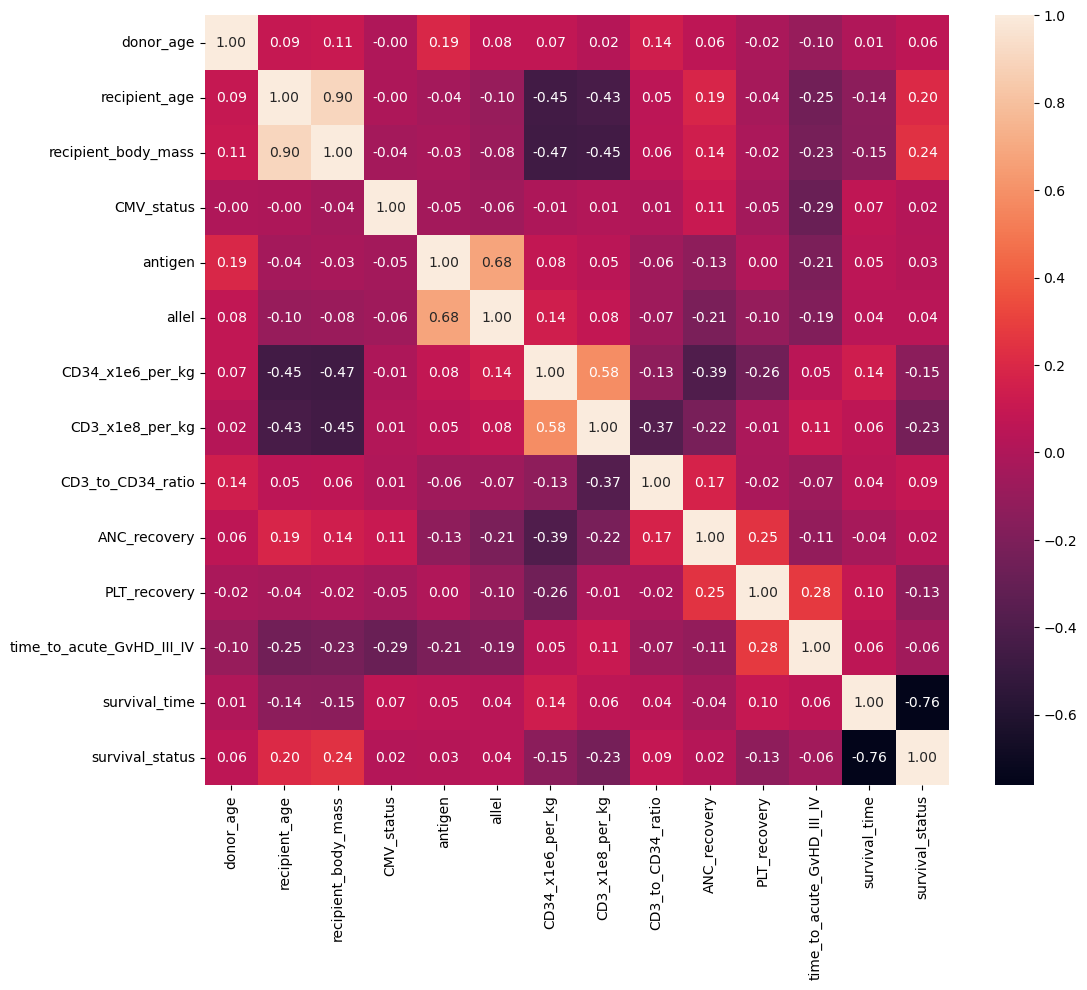

In [6]:
# correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

From the above plot, it is clear to see that survival_time has the highest correlation with survival_status with a correlation coefficient of -0.76. This means that the two variables have a fairly strong negative relationship; as survival_time increases, survival_status is more likely to be low (0, indicating that the patient is alive), and vice versa. This is trivial; patients who do not survive post-transplantation will obviously have lower survival_times than those who did.

Other than survival_time, however, there are no other variables with as strong of a correlation with survival_status. The variables that follow survival_time in correlation strength are recipient_body_mass (r=0.24), CD3_x1e8_per_kg (r=-0.23), recipient_age (r=0.20), and CD34_x1e6_per_kg (r=-0.15).

In [7]:
sns.set_style('white')
sns.set_palette('Set2')

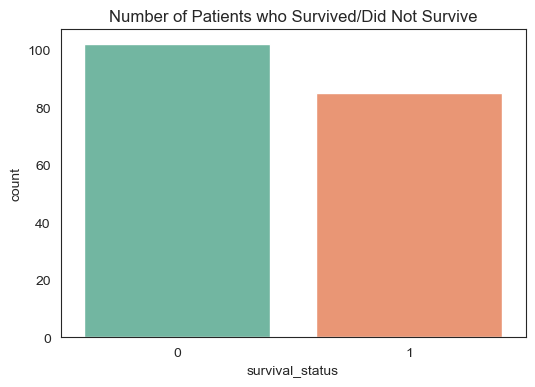

In [8]:
# Frequency of patients who survived/did not survive
fig,ax = plt.subplots(1,1,figsize=(6,4))
sns.countplot(data=df, x='survival_status');
plt.title('Number of Patients who Survived/Did Not Survive');

The above plot shows that the survival_status class is relatively balanced, as there are similar numbers of instances for each. For reference, 0 refers to patients who survived and 1 refers to patients who did not survive.

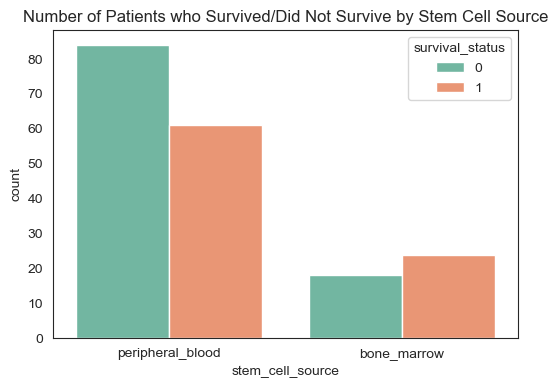

In [9]:
# Comparing survival_status for different stem_cell_source
fig,ax = plt.subplots(1,1,figsize=(6,4))
sns.countplot(data=df, x='stem_cell_source', hue='survival_status');
plt.title('Number of Patients who Survived/Did Not Survive by Stem Cell Source');

This is interesting. It seems that the patients who received stem cell transplants from peripheral blood had a higher survival rate than those who received stem cell transplants from the bone marrow. Of the patients who received a transplant from the peripheral blood, more patients survived than died. However, of patients who received a bone marrow transplant, more patients died than survived. 

It is important to note, however, that the number of patients who received peripheral blood transplants far surpasses the number of patients who received bone marrow transplants and that this result may not be significant as a result.

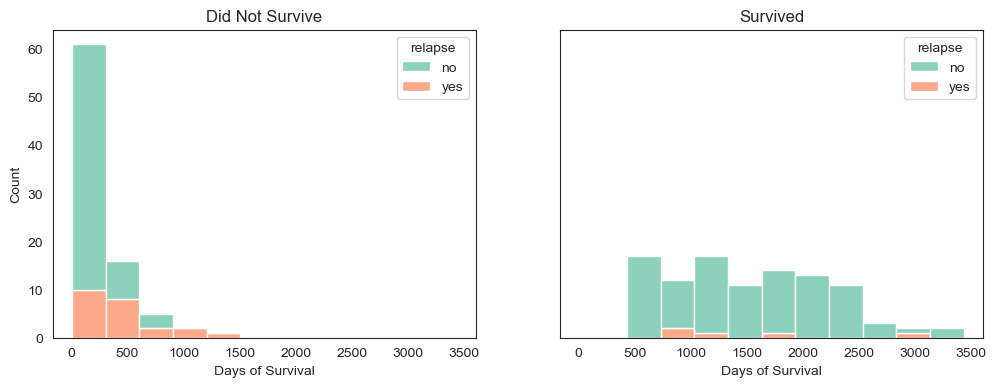

In [10]:
# Comparing survival_time, relapse between patients who did or did not survive
fig,ax = plt.subplots(1,2,figsize=(12,4), sharex=True, sharey=True)

sns.histplot(data=df[df.survival_status == 1], x='survival_time', binwidth=300, 
             hue='relapse', hue_order=['no','yes'], multiple='stack', ax=ax[0]);
ax[0].set_xlabel('Days of Survival');
ax[0].set_title('Did Not Survive');

sns.histplot(data=df[df.survival_status == 0], x='survival_time', binwidth=300, 
             hue='relapse', hue_order=['no','yes'], multiple='stack', ax=ax[1]);
ax[1].set_xlabel('Days of Survival');
ax[1].set_title('Survived');

The above plot shows that, patients who did not survive typically did not survive past 1500 days. On the other hand, the patients who did survive typically all survived past 500 days.

Whether the patient relapsed after receiving the transplant seems to be markedly different between the patients who survived and those who did not: rarely any of the patients who survived seem to have experienced a relapse of their disease, whereas this was more common among those who did not survive. Past ~1000 days of survival, relapse of the disease seems to be the sole reason for the patient's death, over other factors such as secondary malignancies, sepsis, or other infections.

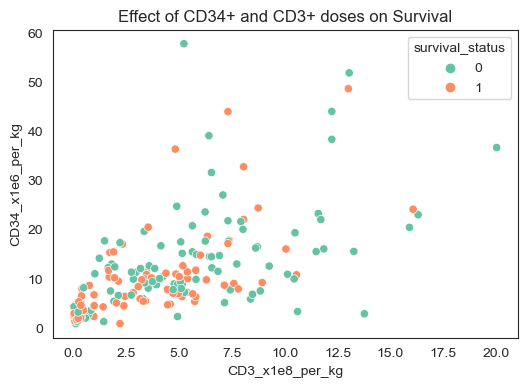

In [11]:
# Effect of CD34+ and CD3+ cell doses on survival
fig,ax = plt.subplots(1,1,figsize=(6,4))
sns.scatterplot(data=df, x='CD3_x1e8_per_kg', y='CD34_x1e6_per_kg', hue='survival_status');
plt.title('Effect of CD34+ and CD3+ doses on Survival');

Here, it does not seem that the doses of CD34+ and CD3+ cells seem to have a noticeable effect on the survival of patients. At lower doses of both the CD34+ and CD3+ cells, there does not seem to be a pattern in survival status. 

However, at higher doses of CD3+ cells, patients seem to have a higher survival rate. Looking at the above plot closely, it seems that past 10 x 10^8 dose of CD3+ cells, everyone seem to have survived with the exception of 4 patients.